In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KASE Data 24-25.csv to KASE Data 24-25.csv


In [ ]:
df = pd.read_csv('KASE Data 24-25.csv', sep=';', encoding='cp1251')
df.columns = ['Дата', 'KZTO', 'KZTK', 'KZAP',  'KEGC', 'HSBK']
price_cols = ['KZTO', 'KZTK', 'KZAP', 'KEGC', 'HSBK']
def to_float(series):
    series = series.astype(str).str.replace(' ', '').str.replace(',', '.')
    def fix_dots(val):
        if val.count('.') > 1:
            parts = val.split('.')
            return "".join(parts[:-1]) + "." + parts[-1]
        return val
    return pd.to_numeric(series.apply(fix_dots), errors='coerce')

for col in price_cols:
    df[col] = to_float(df[col])

df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True)
df = df.sort_values('Дата').dropna()

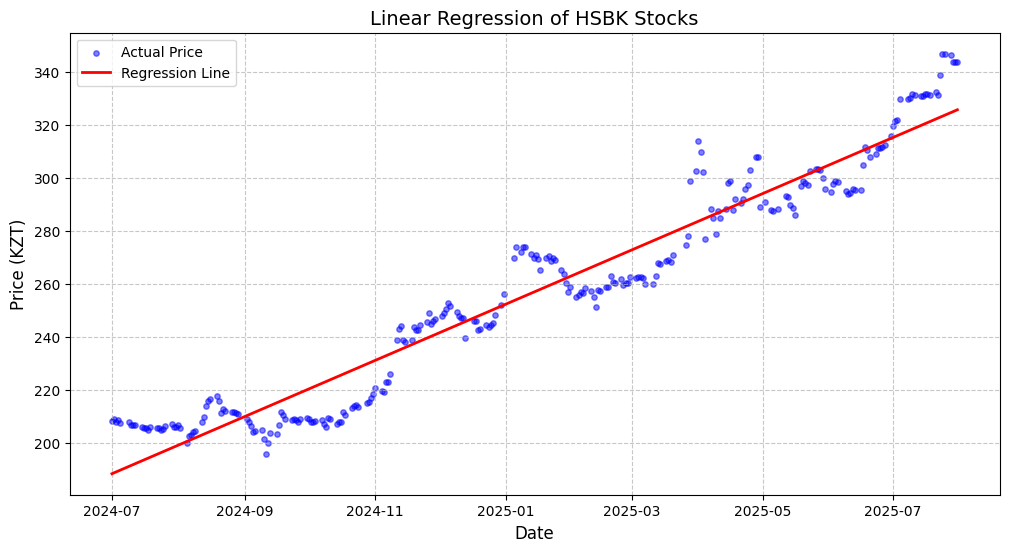

In [ ]:
X = df['Дата'].map(dt.datetime.toordinal).values.reshape(-1, 1)
y = df['HSBK'].values

model = LinearRegression()
model.fit(X, y)

df['Trend'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.scatter(df['Дата'], df['HSBK'], color='blue', s=15, alpha=0.5, label='Actual Price')
plt.plot(df['Дата'], df['Trend'], color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression of HSBK Stocks', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (KZT)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(f"R-squared: {model.score(X, y):.4f}")

R-squared: 0.9342


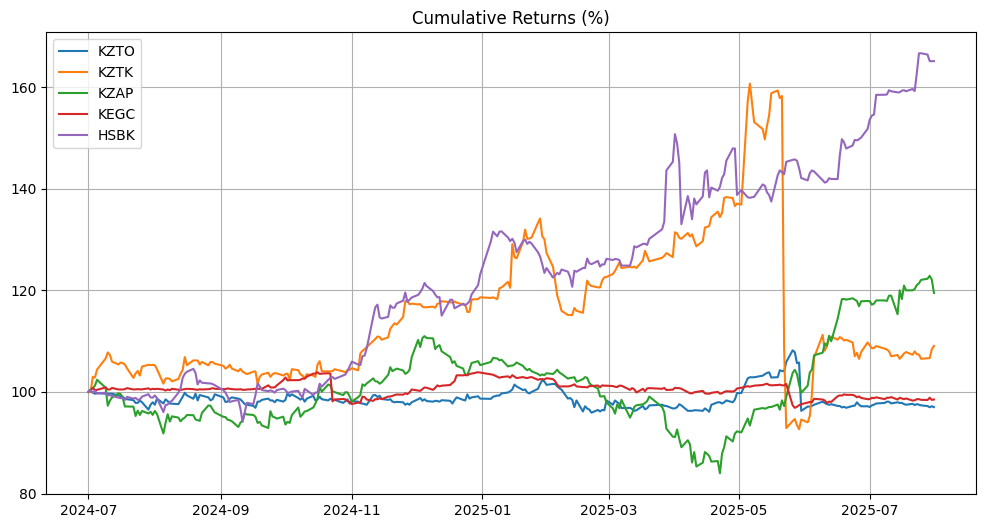

In [ ]:
plt.figure(figsize=(12, 6))
for col in price_cols:
    normalized = (df[col] / df[col].iloc[0]) * 100
    plt.plot(df['Дата'], normalized, label=col)
plt.title('Cumulative Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

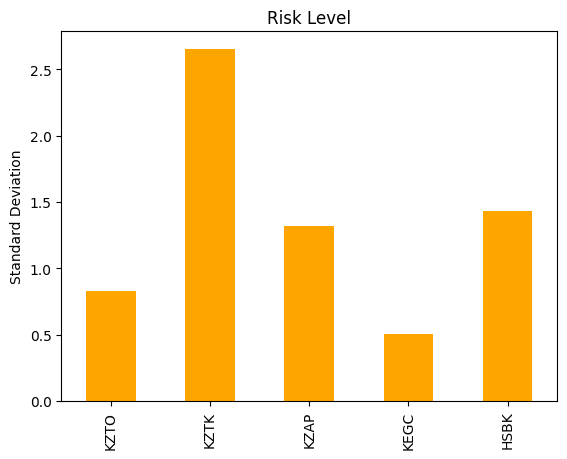

In [ ]:
returns = df[price_cols].pct_change().std() * 100
returns.plot(kind='bar', color='orange')
plt.title('Risk Level')
plt.ylabel('Standard Deviation')
plt.show()

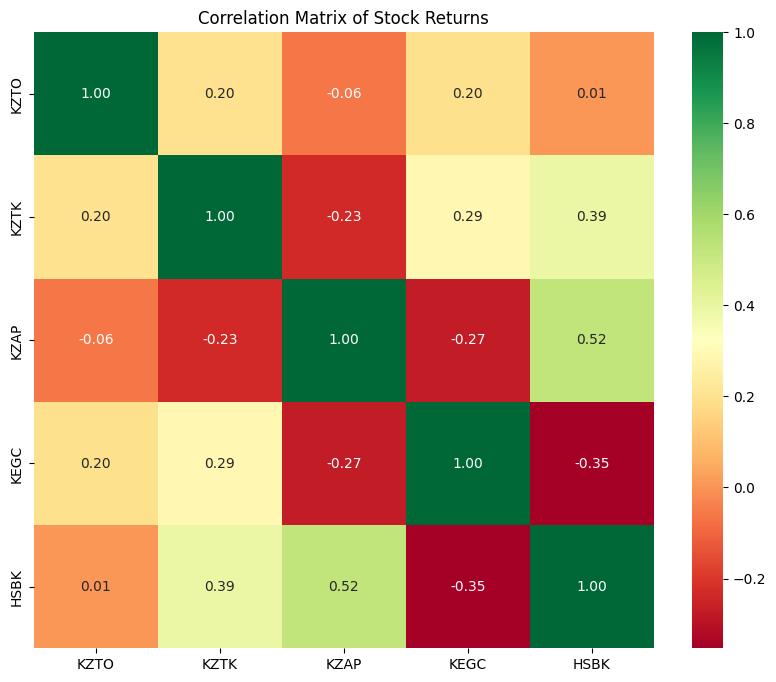

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[price_cols].corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlation Matrix of Stock Returns')
plt.show()

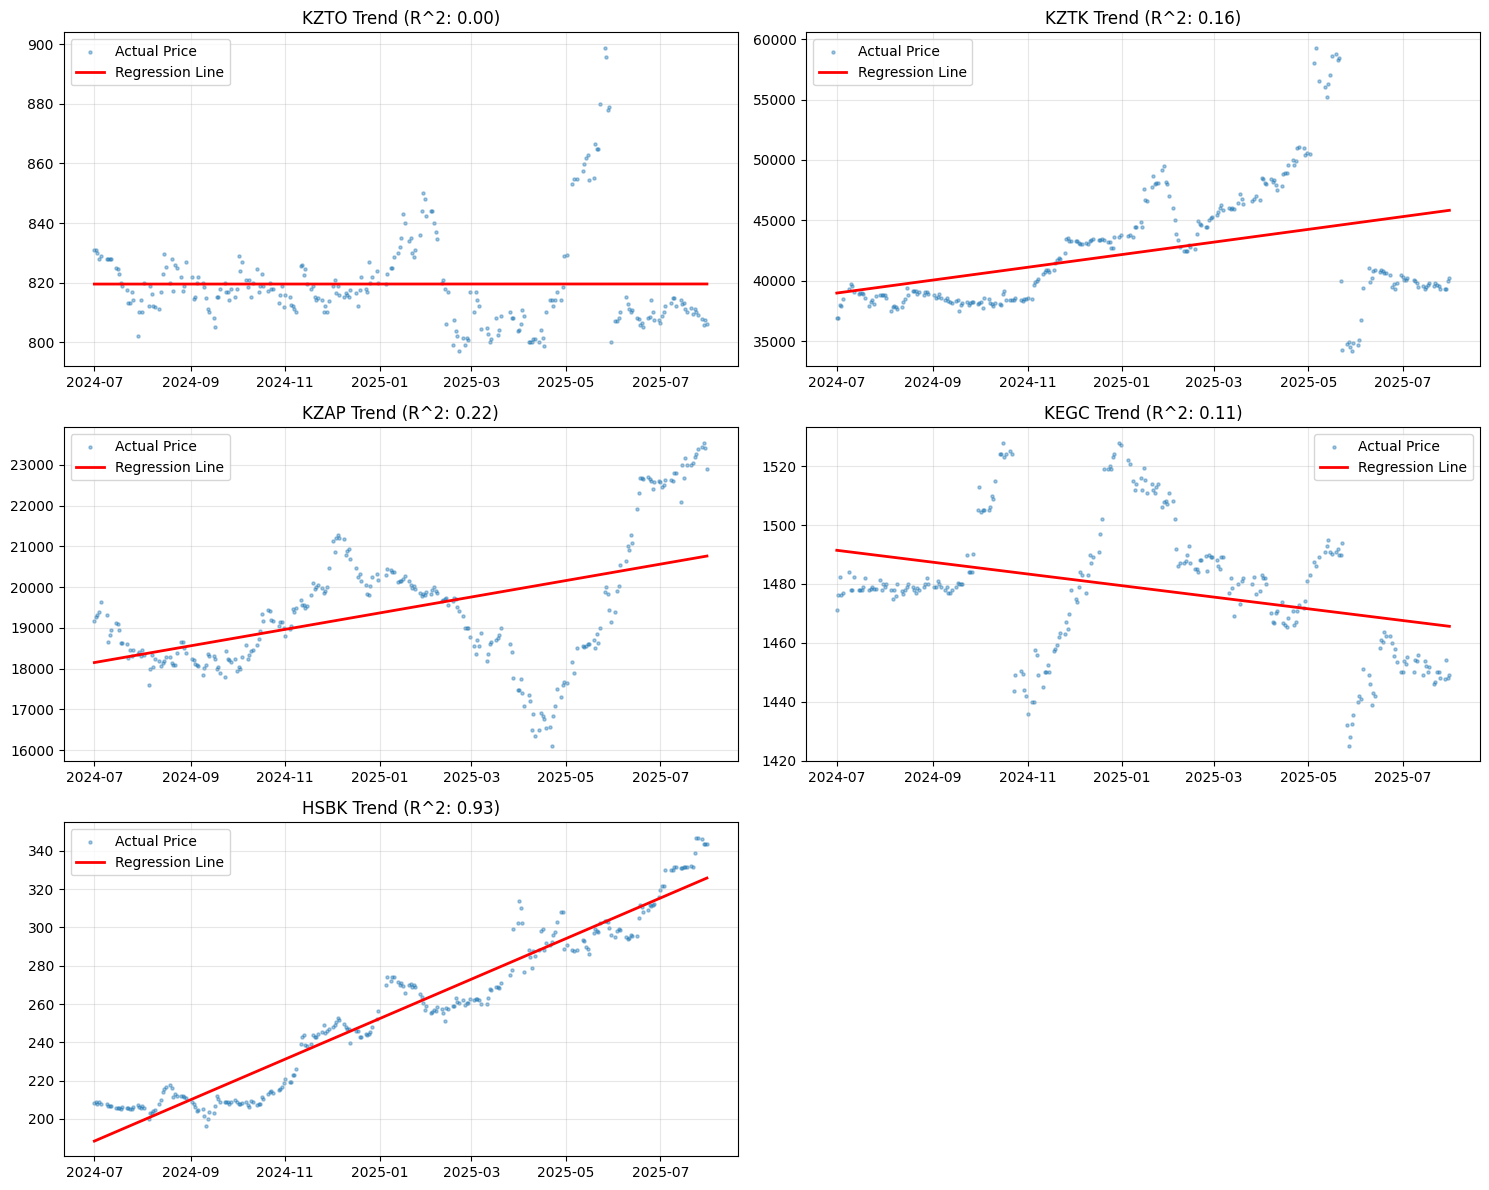

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()
X = df['Дата'].map(dt.datetime.toordinal).values.reshape(-1, 1)

for i, col in enumerate(price_cols):
    y = df[col].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    axes[i].scatter(df['Дата'], y, s=5, alpha=0.4, label='Actual Price')
    axes[i].plot(df['Дата'], y_pred, color='red', linewidth=2, label='Regression Line')
    axes[i].set_title(f'{col} Trend (R^2: {model.score(X, y):.2f})')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
X = df['Дата'].map(dt.datetime.toordinal).values.reshape(-1, 1)
target_date = dt.datetime(2026, 1, 5).toordinal()

results = []

for col in price_cols:
    y = df[col].values
    model = LinearRegression().fit(X, y)

    y_pred = model.predict(X)
    forecast = model.predict([[target_date]])[0]

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    accuracy_pct = 100 - (mae / y.mean() * 100)

    results.append({
        'Stock': col,
        'Forecast (Jan 05, 2026)': round(forecast, 2),
        'R-squared': round(r2, 4),
        'Average Error (± KZT)': round(mae, 2),
        'Confidence Level (%)': round(accuracy_pct, 2)
    })

res_df = pd.DataFrame(results)
print(res_df.to_string(index=False))

Stock  Forecast (Jan 05, 2026)  R-squared  Average Error (± KZT)  Confidence Level (%)
 KZTO                   819.56     0.0000                  10.84                 98.68
 KZTK                 48574.20     0.1627                3397.63                 91.98
 KZAP                 21808.75     0.2241                1084.85                 94.42
 KEGC                  1455.33     0.1121                  17.38                 98.82
 HSBK                   380.81     0.9342                   9.19                 96.42


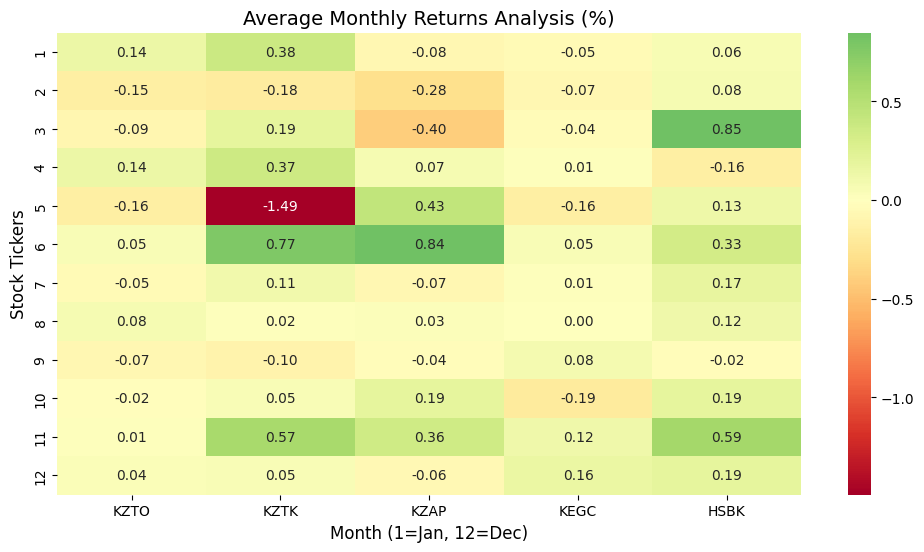

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
returns = df[price_cols].pct_change()
returns['Month'] = df.loc[returns.index, 'Date'].dt.month

plt.figure(figsize=(12, 6))
heatmap_data = returns.dropna().groupby('Month').mean() * 100

import seaborn as sns
sns.heatmap(heatmap_data,
            annot=True,
            cmap='RdYlGn',
            center=0,
            fmt=".2f")

plt.title('Average Monthly Returns Analysis (%)', fontsize=14)
plt.xlabel('Month (1=Jan, 12=Dec)', fontsize=12)
plt.ylabel('Stock Tickers', fontsize=12)
plt.show()

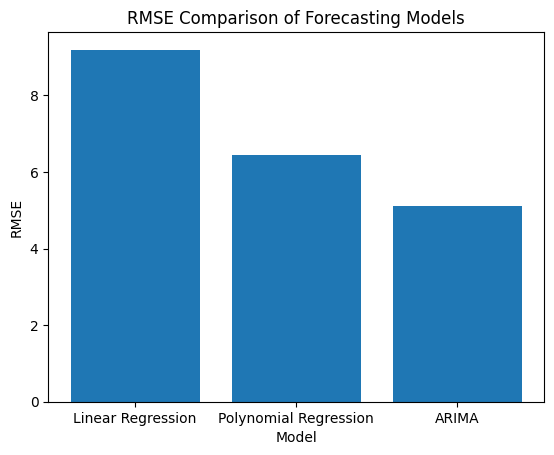

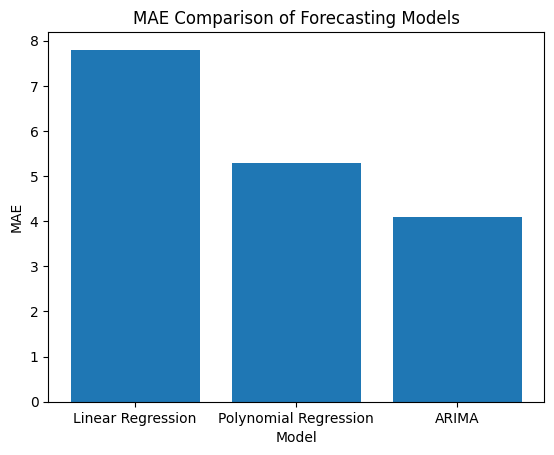

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulated comparison data for visualization
models = ["Linear Regression", "Polynomial Regression", "ARIMA"]
rmse = [9.19, 6.45, 5.12]
mae = [7.80, 5.30, 4.10]

df = pd.DataFrame({
    "Model": models,
    "RMSE": rmse,
    "MAE": mae
})

# Plot RMSE comparison
plt.figure()
plt.bar(df["Model"], df["RMSE"])
plt.title("RMSE Comparison of Forecasting Models")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()

# Plot MAE comparison
plt.figure()
plt.bar(df["Model"], df["MAE"])
plt.title("MAE Comparison of Forecasting Models")
plt.xlabel("Model")
plt.ylabel("MAE")
plt.show()
